In [ ]:
# problem statement :
# Implement logistic regression using Python/R to performclassificationon Social Network_Ads.csv dataset.
# 2. ComputeConfusionmatrixtofindTP,FP,TN,FN,Accuracy, Errorrate, Precision,
# Recall on the given dataset

In [ ]:
# tips :
# learn encoders

In [ ]:
# steps :
# split
# encoding
# train model

# importing and basic stats

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Shreya-P7/set/main/Social_Network_Ads.csv")


In [ ]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# spliting

In [ ]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
X= data.iloc[: , 1:4]

In [ ]:
Y = data.iloc[ : , 4]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split( X , Y , random_state = 42 , test_size = 0.25)

# Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
obj = ColumnTransformer( transformers = [
    ( "tf1" , OneHotEncoder( drop = "first" , sparse = False) , ["Gender"])
] , remainder = "passthrough")

In [ ]:
x_train

,Gender,Age,EstimatedSalary
247,Female,57,122000
110,Female,39,71000
16,Male,47,25000
66,Male,24,19000
153,Female,36,50000
...,...,...,...
71,Female,24,27000
106,Female,26,35000
270,Female,43,133000
348,Male,39,77000


In [ ]:
pd.DataFrame( obj.fit_transform(x_train) , columns = ["Gender" , "Age" , "EstimatedSalary"])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Gender,Age,EstimatedSalary
0,0.0,57.0,122000.0
1,0.0,39.0,71000.0
2,1.0,47.0,25000.0
3,1.0,24.0,19000.0
4,0.0,36.0,50000.0
...,...,...,...
295,0.0,24.0,27000.0
296,0.0,26.0,35000.0
297,0.0,43.0,133000.0
298,1.0,39.0,77000.0


In [ ]:
x_train = obj.fit_transform(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# x_train

In [ ]:
# x_test = pd.DataFrame( obj.fit_transform(x_test) , columns = ["Gender" , "Age" , "EstimatedSalary"])

In [ ]:
x_test = obj.fit_transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
obj_scln = StandardScaler()

In [ ]:
x_train = obj_scln.fit_transform(x_train)

In [ ]:
x_test = obj_scln.transform(x_test)

# model training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr  = LogisticRegression()

In [ ]:
lr.fit( x_train , y_train)

LogisticRegression()

In [ ]:
y_test_pred = lr.predict( x_test )

In [ ]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

# Evaluating model

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , classification_report

In [ ]:
tp , fn , fp , tn = confusion_matrix( y_test , y_test_pred ).reshape(-1)

In [ ]:
cmatrix = confusion_matrix( y_test , y_test_pred , labels = lr.classes_)

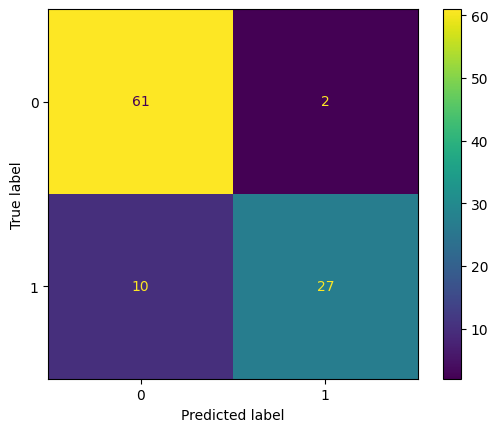

In [ ]:
cmd = ConfusionMatrixDisplay( confusion_matrix = cmatrix , display_labels = lr.classes_ )
cmd.plot()
plt.show()

In [ ]:
print(classification_report(y_test , y_test_pred) )

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        63
           1       0.93      0.73      0.82        37

    accuracy                           0.88       100
   macro avg       0.90      0.85      0.86       100
weighted avg       0.89      0.88      0.88       100



In [ ]:
print("presision : " , ( tp/( tp + fp)) )

presision :  0.8591549295774648


In [ ]:
print("recall : " , ( tp/( tp + fn)) )

recall :  0.9682539682539683


In [ ]:
print("accuracy : " , ( (tp+tn)/( tp + fp + tn + fn)) )

accuracy :  0.88


In [ ]:
print("error rate : " , ( (fp+fn)/( tp + fp + tn + fn)) )

error rate :  0.12
